# Summer School on Data Science Tools and Techniques in Modelling Complex Networks

### [Bogumił Kamiński](http://bogumilkaminski.pl/about/)

## Introduction to Julia language with applications to machine learning
### Day 1, Monday, August 19th, 2019, 13:00 to 16:00

**Note:** the examples here are not tuned for optimal performance but to be a gentle introduction to the Julia language for ML practicioners (if time allows we will come back to them during the last day of the workshop to show how their speed can be improved)

In [1]:
using Pkg
Pkg.activate(".");

In [2]:
using Serialization

train_images, train_labels, test_images, test_labels = deserialize("mnist.data");

In [3]:
using Images, WebIO, Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-5369513011913584416\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-7298762031993383280\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-5369513011913584416\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [4]:
vbox(hbox([vbox(Gray.(train_images[i]), "True: $(train_labels[i])") for i in 1:8]...),
     hbox([vbox(Gray.(train_images[i]), "True: $(train_labels[i])") for i in 9:16]...),
     hbox([vbox(Gray.(train_images[i]), "True: $(train_labels[i])") for i in 17:24]...),
     hbox([vbox(Gray.(train_images[i]), "True: $(train_labels[i])") for i in 25:32]...))

(div { style=Dict("display"=>"flex","flex-direction"=>"column") }
  (div { style=Dict("display"=>"flex","flex-direction"=>"row") }
    (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
      (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAIKSURBVGje7dpPiI1RGMfxzyAL8qfZmFISi1EiFigpSZJiMbGhbLBDVjZ2FqSwQBazUhayxYryd6FuTf5syN6fHYM0yGDxvJPr3tu9c2eKc0/nW29v5z3ve3/93qdz3uc551IoFAqFQqHQ+/R1+8BMLKhrH8EcDOIwzmEvvuIMTjY8P+NfO8xfcFanG5ZgNjZiExZid4v7XuMihvAZz/EwBYf5C7Ydh2tx19/jrhU/cQBfqvZbfMCrFBzmL9g2hv2oYVmLvhpGsQXfdY7zf3OYv2DbufQ9jmMnnoq5Ep5hmxh3K3EsZYf5C04qp5kvvnHDOIj9uNYrDvMX7JjTwKfq/LE6H8J18R1M3mH+gl3VFnNxC5uxA3d6wWH+gl3Xh8vxROQz9zGCy/iVqsP8BbuOIVEDXsG8qn0CV/EuRYf5C04phrAK57G1ag/jFN6k5jB/wSnHkFiz2SXGZB/uiZojKYf5C04rhhN8EwnuD2zHg5Qc5i84qdqiFauxB+vqfuQFHqXmMH/BrmM4iKMirxmouz4ucppONWP+rzTduXQA+8T+0tKGvhGRz9xM0WH+gh1juEisiV7Cioa+Gs7ihsmv2eT/StOJYb+oF9Zo3rd4LOqK2xhL3WH+gk0x3CD2KtZjcUPfGC7gtD97hck7zF+wKacZqo4JXoo10nHxP4vRXnOYv2ChUCgUps9vDE1MYMzifHwAAAAASUVORK5CYII='></img>" })
      "True: 5")
    (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
      (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAIWSURBVGje7dlPiE1RHAfwzwx5jWQWNtRkxw6vNxErskRRFpLMVklNkbJAVhb+LFCipIgiWRDJZuqtbPzb20kpTMKkKHMtzpVHc999b5TOnM63Tt13zv3db9/z7fc7v3sfGRkZGRkZGQP/EjyKAxjDdVzA85qYwf+tMH3CWXvYxAQWd8x9wpLYFKZPOH82QetwF8Mo8AXfBf824Fn5OwqF6RP2lYcL0cINjJTBhVA/T+FWOXcMJ2NRmD5hX3l4GbtnmG9hEdrYhFUxKUyfsGcPR7HV78Rt4wFO4y1e4CM2657c6W9pnLW06c/+5ZGQjxuxGlfwvlz7ga/l2kw9avpbGl8ersRhoX/5IOTcNUzhYTn+xhAOYU8MCtMn7OphA2ewReg9x/BU8KgOy2NRmD5hVw9bgn+wXTgD55zC9Am7enhWODDbevdvENOqD9r0tzQeD7cJvUyB+308cLqMeRmLwvQJKz0cwgK8w+0eHtTAifJ6AkdiUZg+YW1f+k3oRbuhgaNC//pGqMFTsShMn7DWw7o62hS824V72BmbwvQJKz0cKMcOjFfcc1DIv2HcFN49olOYPmGlh0U5luI8rmIS67EXa4Tv3q/xGBdjVZg+YW0tnYf9Qo38jBUda0+E/uV4zArTJ6z8XjqCO1jbcWNRXk8K/zON6x/pb2k8HsIy7BPOvF8ensMlvJorCtMnzMjIyMjIyOAnQ85TpVMJlhIAAAAASUVORK5CYII='></img>" })
      "True: 0")
    (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
      (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAGlSURBVGje7dixS5VRHMbxj3IJWhILESGCBmmzqSEHCy5EtDcpbhr0bzQFzk0ODjVGOjU0OVmko5EJQVJDWyAkgVDDe8Dee68k773kuT/Osxzuue99vuc5D+d9uS9FRUVFRUVFRcOvkUEbtvECd7DX4/vR/50wPrDVOTGHK3jV0PAWtnNKGB/Y1eFdTGvW4Siu45rTD3j8LT3/Dhex1dBsCkt4jo+5JIwP7OqwnxWspnE/p4TxgbUOZzDZh9lYGt/klDA+sNbhA1xsaDSpehbCt5wSxgfWOryRxt0GRiuqHj/hMKeE8YGtXpPvz/jjS7iPBdxLc0/wI6eE8YE9O7zc8flmWlkbV3EB82nuCO/wK5nt5JYwPrD2N+4ZHqnO0cFf8zPpwmP8xAdVb9vYxHd8xbiq36wSxgfWzuFjfMFsx0UH2FB197aHyTIm8DnHhPGBXffSpw1M2ml8mWPC+MBW/xYnWs8xYQEWYP7AgZ3DEdW78n+9a42/pcPb4e8zrj7+lg5vh3Aba7kljA8c6L00y4TxgQPp8DUe5powPrCoqKioqH/9ATeSLmyCLr3XAAAAAElFTkSuQmCC'></img>" })
      "True: 4")
    (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
      (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAF/SURBVGje7dixShxRGIbhxyVgYaEhglhlr0C8gC1SJGKRwsqU5gbSCVqksQukEkkdsU/hBSjaLHgH2ggpUsTKwsrCpJiBXYVkZ3YX58zP+apzYJh3Xz7+M4clJycnJycnJ6f9mZnWiz5jDx28wfk/nus8t2F84ItpvOQjdvFQ7v+kZBgfOJUOX2M2VcP4wIk7fItP5foS7/E7JcP4wIk67OEQ8+X+K36mZhgfOFGHW1gu12c4StEwPnDse+mi4sx8wC0+4DRFw/jAseawix9D+wPV+mvEMD5wrA7XsVKuT7CfsmF8YO2zdENxj5lDH5v+fw9t3DA+sNYcdj0+Q6/V668Rw/jAWh3uGPwXA1/aYBgfWLnDVawN7Y9x1QbD+MDK38MbvCzXF4p7zV0bDOMDK8/hK4Nz9Jvx+mvEMD6wUoffn/yyfpsM4wNHdriKd4oZvFfMYN27aKOG8YEjO1zAUrn+he22GWZgBqYPHDmHl4rvX6+thvGBOTk5OTmT5y9D7yxecgVygwAAAABJRU5ErkJggg=='></img>" })
      "True: 1")
    (div { style=Dict("display"=>"flex","flex-dir

In [5]:
vbox(hbox([vbox(Gray.(test_images[i]), "True: $(test_labels[i])") for i in 1:8]...),
     hbox([vbox(Gray.(test_images[i]), "True: $(test_labels[i])") for i in 9:16]...),
     hbox([vbox(Gray.(test_images[i]), "True: $(test_labels[i])") for i in 17:24]...),
     hbox([vbox(Gray.(test_images[i]), "True: $(test_labels[i])") for i in 25:32]...))

(div { style=Dict("display"=>"flex","flex-direction"=>"column") }
  (div { style=Dict("display"=>"flex","flex-direction"=>"row") }
    (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
      (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAGrSURBVGje7dk/a9VQHIfxT711EFysKDhYOzl0KSKCoILiYtuhg30L10U7dnZ3dPAddBEEQRERKuigDl1E7T+8HVREEOqghaKFOiRDKVy9aUp78uN8l5z8IQ8PX06SQ8jJycnJycnJycnJyamfvm4nJtHGV6xjBt/wsSbwwF4bxgd27XAFQ9uO/cSH/9zwC+5gLhXD+MD+bifaGME8hnEGl3Een3Fyy7Ub+I4T5f4nucM9TF+Vi48oupzDuS3H17GMBQzgFu6lYhgfWKnDf+U67uM9rmA1FcP4wF3p8DjeldtJPEjJMD6wv/4tuIlj+IGl1AzjA2vPwwt4joOKb56XqRnGB9aeh2OK/mbxOkXD+MBaHR7CNfzGbfxJ0TA+sFaH04q1xlO8StUwPnDH78NxPMQaRvX2HN0Xw/jAHc3Do7iLFp7ovb99MYwPrDwPW3iDs+go3oedlA3jAyt3eBqL5XgCj1I3jA+s9Cw9hWfleBqPm2AYH1ipwxsYLMcvsNkEw/jAnju8hKkmGsYH9tzhRRwuxx38aophfGDltcVbXNX931JyhvGBOc3PX/q9Oc17OzXKAAAAAElFTkSuQmCC'></img>" })
      "True: 7")
    (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
      (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAHhSURBVGje7dnPi01hHMfxF80oK5lZaMpKsqAojY212DBSin9DBiWy4l+ws8BGk2kiCztTCmWBmtgobEhSIik/snge3bm3cc85ppxzvz2fuvXt+5zuu8/99D33PM+hqKioqGi1WlP3wlmsx04czb3LeIBrDYBr/7fD+MBaGd7Qy21QL7EPb7rqMD6wMsPB/F7gLrbgUO6dx6WuOowPHBu2OI0juV7CDD7gC9bhIXZhossO4wOHZjglDeoSDuDtsrVZbM/1nS47jA8cmuFtbMVnfBxYO4bxUXAYHzhWdcHrFXqnsC3Xj/Knsw7jA2vvLf7oIOak/8P3OI7FLjuMD6ycw0FNS/mRnlmb5NeKw/jARhkuYH+ur+LcKDiMD6x9L53CU0xK+4u90v6+8w7jA2vP4U0pP7ju3/JrxWF8YK0MZ7A71/dwYZQcxgdWZjiJs3p7wSfSOc3IOIwPrMzwJPbkesHqZrAVh/GBlc803/RmcLP+87aRcBgf2GhvMYHvA71PuTeODbm3ESeWXfMTZ/C1DYfxgY0yfLZCb06azU3SGerf9A4X23AYH1h5L53H4QZf+AO/cn0Lj3N9X3rnH/8n7V6GcFr/O4od+mfuCl7leh7Pu+QwPrCoqKioqKioKIJ+AzhFQPcCumLaAAAAAElFTkSuQmCC'></img>" })
      "True: 2")
    (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
      (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAFHSURBVGje7detSgRRGMbxn19lo+BH06QILipYRMRgEwSzyRsQ78PqHdiExbSg1WrRKCaLRcMmxeJHcC5gZwbcc17OU94Jw/z58/CemaGkpKSkpKRkrO0DlvCIU5wPcf/4fxvGB062fcAGvvGSqmF8YOsO1/GOq1QN4wNbddjFCS5SNowPbNXhMjq4TNkwPrDVN80dZrDq7zxN0jA+sPEeLmITT4bvbySG8YGNO9yt5lvqhvGBjTvsVvMsdcP4wEbvwy308YxtfKZsGB/YaA/3MI0b9fobiWF8YKMO1/CDXg6G8YG1z9J5PGCAlRwM4wNr7+ExZnGdi2F8YO0OF6o5yMUwPrB2hwfV7OdiGB9Yq8MdzOVmGB9Yq8NDTOAet7kYxgcO3WEH+9V1D1+5GMYHDv1vMeVv915xhI9cDOMDS0pKSkpKSvgFnPUiCkwgYfcAAAAASUVORK5CYII='></img>" })
      "True: 1")
    (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
      (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAH0SURBVGje7dmxaxRBFAbwX6KdrVdYRRBR0lmoXQQrBQ9sRMEUYmEQMfYGlLQKVkpEG/8BG5EUNkIs0sTCJoIgeDYiaiFICIhisXvscNns7SKYcZivub3Hm/3m4+PNzrwhIyMjIyMjY6LrgD24izm8xjkMOoyf/NcK0yfs7OFBrAeznceDmBWmT7i7S3IPT/43hekTtvZwHmdxbCQ+U876DVZiVJg+Yeu19Bd+18x2GBvgvOIbGZXC9AlbebiM07Z6+A0/MBXEdsWmMH3CsWvpCRxS+Bd6+BAv8B0nsVDGr2IpJoXpEzbW4X6sYq9q3RzgKRaxUeZNlXk9bOIW7uNnDArTJ2z0cPQc8RIX8LUm9zruqbw+jPcxKEyfsPW+dA2X1fsHz3ARR2NTmD7hWA+HMzo+Jm+izB3mL2I2BoXpEzZ6OGfrXnQ79HFEtfe5HYvC9AkbPey3eEEP07gZxL6o38/siML0CTv12uqwgGvB/w+4hI+xKEyf8K88XFacHUO8xauYFKZP2Hi2eIcD5fOZ8vcx9gWzHf1e5j5NXHW4hDvl83OVX6Fvo72b6BSmT9hYh2H/pa7mJvFZsX5ewSdV7yYahekTju15zyjunG6o9zDfAe84Yeu7p1OKWusrejKPysHrtt+DRqEwfcKMjIyMjIwM/gC5j04wkka+LwAAAABJRU5ErkJggg=='></img>" })
      "True: 0")
    (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
      (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQA

### 1 nearest neightbor

In [6]:
using Distances, Statistics

In [7]:
@time prediction = [train_labels[argmin(euclidean.(Ref(img), train_images))] for img in test_images];

286.479449 seconds (1.07 M allocations: 4.523 GiB, 0.07% gc time)


In [8]:
mean(prediction .== test_labels)

0.9691

In [9]:
using FreqTables

In [10]:
freqtable(test_labels, prediction)

10×10 Named Array{Int64,2}
Dim1 ╲ Dim2 │    0     1     2     3     4     5     6     7     8     9
────────────┼───────────────────────────────────────────────────────────
0           │  973     1     1     0     0     1     3     1     0     0
1           │    0  1129     3     0     1     1     1     0     0     0
2           │    7     6   992     5     1     0     2    16     3     0
3           │    0     1     2   970     1    19     0     7     7     3
4           │    0     7     0     0   944     0     3     5     1    22
5           │    1     1     0    12     2   860     5     1     6     4
6           │    4     2     0     0     3     5   944     0     0     0
7           │    0    14     6     2     4     0     0   992     0    10
8           │    6     1     3    14     5    13     3     4   920     5
9           │    2     5     1     6    10     5     1    11     1   967

In [11]:
vbox(hbox([vbox(Gray.(test_images[i]), "True: $(test_labels[i]), pred: $(prediction[i])") for i in 1:8]...),
     hbox([vbox(Gray.(test_images[i]), "True: $(test_labels[i]), pred: $(prediction[i])") for i in 9:16]...),
     hbox([vbox(Gray.(test_images[i]), "True: $(test_labels[i]), pred: $(prediction[i])") for i in 17:24]...),
     hbox([vbox(Gray.(test_images[i]), "True: $(test_labels[i]), pred: $(prediction[i])") for i in 25:32]...))

(div { style=Dict("display"=>"flex","flex-direction"=>"column") }
  (div { style=Dict("display"=>"flex","flex-direction"=>"row") }
    (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
      (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAGrSURBVGje7dk/a9VQHIfxT711EFysKDhYOzl0KSKCoILiYtuhg30L10U7dnZ3dPAddBEEQRERKuigDl1E7T+8HVREEOqghaKFOiRDKVy9aUp78uN8l5z8IQ8PX06SQ8jJycnJycnJycnJyamfvm4nJtHGV6xjBt/wsSbwwF4bxgd27XAFQ9uO/cSH/9zwC+5gLhXD+MD+bifaGME8hnEGl3Een3Fyy7Ub+I4T5f4nucM9TF+Vi48oupzDuS3H17GMBQzgFu6lYhgfWKnDf+U67uM9rmA1FcP4wF3p8DjeldtJPEjJMD6wv/4tuIlj+IGl1AzjA2vPwwt4joOKb56XqRnGB9aeh2OK/mbxOkXD+MBaHR7CNfzGbfxJ0TA+sFaH04q1xlO8StUwPnDH78NxPMQaRvX2HN0Xw/jAHc3Do7iLFp7ovb99MYwPrDwPW3iDs+go3oedlA3jAyt3eBqL5XgCj1I3jA+s9Cw9hWfleBqPm2AYH1ipwxsYLMcvsNkEw/jAnju8hKkmGsYH9tzhRRwuxx38aophfGDltcVbXNX931JyhvGBOc3PX/q9Oc17OzXKAAAAAElFTkSuQmCC'></img>" })
      "True: 7, pred: 7")
    (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
      (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAHhSURBVGje7dnPi01hHMfxF80oK5lZaMpKsqAojY212DBSin9DBiWy4l+ws8BGk2kiCztTCmWBmtgobEhSIik/snge3bm3cc85ppxzvz2fuvXt+5zuu8/99D33PM+hqKioqGi1WlP3wlmsx04czb3LeIBrDYBr/7fD+MBaGd7Qy21QL7EPb7rqMD6wMsPB/F7gLrbgUO6dx6WuOowPHBu2OI0juV7CDD7gC9bhIXZhossO4wOHZjglDeoSDuDtsrVZbM/1nS47jA8cmuFtbMVnfBxYO4bxUXAYHzhWdcHrFXqnsC3Xj/Knsw7jA2vvLf7oIOak/8P3OI7FLjuMD6ycw0FNS/mRnlmb5NeKw/jARhkuYH+ur+LcKDiMD6x9L53CU0xK+4u90v6+8w7jA2vP4U0pP7ju3/JrxWF8YK0MZ7A71/dwYZQcxgdWZjiJs3p7wSfSOc3IOIwPrMzwJPbkesHqZrAVh/GBlc803/RmcLP+87aRcBgf2GhvMYHvA71PuTeODbm3ESeWXfMTZ/C1DYfxgY0yfLZCb06azU3SGerf9A4X23AYH1h5L53H4QZf+AO/cn0Lj3N9X3rnH/8n7V6GcFr/O4od+mfuCl7leh7Pu+QwPrCoqKioqKioKIJ+AzhFQPcCumLaAAAAAElFTkSuQmCC'></img>" })
      "True: 2, pred: 2")
    (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
      (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAFHSURBVGje7detSgRRGMbxn19lo+BH06QILipYRMRgEwSzyRsQ78PqHdiExbSg1WrRKCaLRcMmxeJHcC5gZwbcc17OU94Jw/z58/CemaGkpKSkpKRkrO0DlvCIU5wPcf/4fxvGB062fcAGvvGSqmF8YOsO1/GOq1QN4wNbddjFCS5SNowPbNXhMjq4TNkwPrDVN80dZrDq7zxN0jA+sPEeLmITT4bvbySG8YGNO9yt5lvqhvGBjTvsVvMsdcP4wEbvwy308YxtfKZsGB/YaA/3MI0b9fobiWF8YKMO1/CDXg6G8YG1z9J5PGCAlRwM4wNr7+ExZnGdi2F8YO0OF6o5yMUwPrB2hwfV7OdiGB9Yq8MdzOVmGB9Yq8NDTOAet7kYxgcO3WEH+9V1D1+5GMYHDv1vMeVv915xhI9cDOMDS0pKSkpKSvgFnPUiCkwgYfcAAAAASUVORK5CYII='></img>" })
      "True: 1, pred: 1")
    (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
      (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAH0SURBVGje7dmxaxRBFAbwX6KdrVdYRRBR0lmoXQQrBQ9sRMEUYmEQMfYGlLQKVkpEG/8BG5EUNkIs0sTCJoIgeDYiaiFICIhisXvscNns7SKYcZivub3Hm/3m4+PNzrwhIyMjIyMjY6LrgD24izm8xjkMOoyf/NcK0yfs7OFBrAeznceDmBWmT7i7S3IPT/43hekTtvZwHmdxbCQ+U876DVZiVJg+Yeu19Bd+18x2GBvgvOIbGZXC9AlbebiM07Z6+A0/MBXEdsWmMH3CsWvpCRxS+Bd6+BAv8B0nsVDGr2IpJoXpEzbW4X6sYq9q3RzgKRaxUeZNlXk9bOIW7uNnDArTJ2z0cPQc8RIX8LUm9zruqbw+jPcxKEyfsPW+dA2X1fsHz3ARR2NTmD7hWA+HMzo+Jm+izB3mL2I2BoXpEzZ6OGfrXnQ79HFEtfe5HYvC9AkbPey3eEEP07gZxL6o38/siML0CTv12uqwgGvB/w+4hI+xKEyf8K88XFacHUO8xauYFKZP2Hi2eIcD5fOZ8vcx9gWzHf1e5j5NXHW4hDvl83OVX6Fvo72b6BSmT9hYh2H/pa7mJvFZsX5ewSdV7yYahekTju15zyjunG6o9zDfAe84Yeu7p1OKWusrejKPysHrtt+DRqEwfcKMjIyMjIwM/gC5j04wkka+LwAAAABJRU5ErkJggg=='></img>" })
      "True: 0, pred: 0")
    (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
      (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdB

### k-Nearest Neighbors

In [12]:
@time all_distances = euclidean.(test_images, permutedims(train_images))

245.634262 seconds (321.55 k allocations: 4.486 GiB, 0.02% gc time)


10000×60000 Array{Float64,2}:
  9.39528  10.3946    9.44042  10.0259   …   9.46746   9.53389   9.22311
 11.183    11.451    11.6569   10.8474      11.2601   10.4641   10.5935 
  9.22377  10.0763    9.15318   6.55863      9.25642   8.44278   8.39121
 10.0315    7.76739  11.8538   12.1505      11.2078    9.50017  11.2098 
 10.5929   10.9646    7.72983   9.96961      9.66197   9.68456   9.80975
  9.40301  10.4702    9.84622   6.18662  …   9.40481   9.05856   8.65329
 10.3916   11.7394    9.56838  10.2894       9.58143  10.0626   10.1717 
 10.0075   11.2429    9.63265   9.4587       9.34646   9.8305    9.60811
  9.86691  10.8617   10.7315   10.5921      10.0591   10.4342   11.2359 
 10.5258   10.2459   10.6323   10.113       10.1628   10.1033    8.97737
 10.7736    8.22291  11.2177   11.0906   …  11.2151   10.2634   11.0159 
 11.1916   10.2309   10.6979    9.725       11.488    10.0241   10.7961 
 10.076    10.1308    9.48247  10.1044       8.77734   9.11332   8.34175
  ⋮                  

In [13]:
@time nearest_neighbors = partialsortperm.(eachrow(all_distances), Ref(1:20))

 74.437100 seconds (805.40 k allocations: 4.509 GiB, 1.19% gc time)


10000-element Array{SubArray{Int64,1,Array{Int64,1},Tuple{UnitRange{Int64}},true},1}:
 [53844, 38621, 16187, 27060, 47004, 14564, 44567, 15261, 40369, 36396, 30503, 14771, 17229, 35920, 27167, 21519, 52011, 38764, 14506, 48109]
 [28883, 49161, 24613, 31635, 16903, 17758, 31957, 24011, 21013, 53456, 52143, 58477, 27536, 57443, 23469, 26358, 1610, 21953, 50899, 12845] 
 [58742, 46513, 15225, 47334, 44039, 42532, 39365, 53362, 12579, 27685, 16652, 16363, 11836, 19675, 56911, 40363, 49339, 19881, 16692, 42103]
 [29045, 59245, 34524, 32709, 1878, 48808, 2328, 11792, 54352, 28428, 59250, 4357, 51291, 26140, 6358, 33844, 34274, 29707, 452, 46773]      
 [52921, 40095, 50610, 25761, 32720, 53520, 24735, 23307, 40601, 30277, 1733, 915, 15515, 26574, 7865, 24121, 19597, 31693, 11957, 41931]    
 [30810, 51901, 3469, 52628, 52269, 9816, 9313, 49973, 14155, 20053, 14981, 32475, 17102, 42838, 19881, 16547, 2871, 25765, 18782, 43706]    
 [18280, 27037, 18718, 49677, 11146, 55, 19479, 12071, 51781, 

In [14]:
nearest_labels = [train_labels[n] for n in nearest_neighbors]

10000-element Array{Array{Int64,1},1}:
 [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 4, 4, 4, 4, 9, 4, 4, 4]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 [4, 4, 4, 4, 4, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9]
 [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
 [5, 5, 5, 5, 5, 5, 9, 5, 9, 5, 6, 5, 4, 8, 4, 5, 6, 5, 8, 8]
 [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 9, 9, 9, 9, 9, 9, 9, 9]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
 [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
 ⋮                                                           
 [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5]
 [6, 6, 6, 6, 6, 6, 6, 6, 6, 6,

In [15]:
# the same - just to show how broadcasting can be used
getindex.(Ref(train_labels), nearest_neighbors)

10000-element Array{Array{Int64,1},1}:
 [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 4, 4, 4, 4, 9, 4, 4, 4]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 [4, 4, 4, 4, 4, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9]
 [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
 [5, 5, 5, 5, 5, 5, 9, 5, 9, 5, 6, 5, 4, 8, 4, 5, 6, 5, 8, 8]
 [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 9, 9, 9, 9, 9, 9, 9, 9]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
 [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
 ⋮                                                           
 [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5]
 [6, 6, 6, 6, 6, 6, 6, 6, 6, 6,

In [16]:
function knn_predict(nearest_labels, k)
    prediction = Int[]
    for ls in nearest_labels
        n = [Int[] for _ in 1:10]
        for i in 1:k
            push!(n[mod1(ls[i], 10)], i) # mod1 transformation recodes 0 to 10
        end
        best_len = maximum(length.(n))
        tmp = [length(x) == best_len ? x[1] : 21 for x in n]
        push!(prediction, mod(argmin(tmp), 10)) # now we transform 10 to 0
    end
    prediction
end

knn_predict (generic function with 1 method)

In [17]:
preds = [mean(knn_predict(nearest_labels, k) .== test_labels) for k in 1:20]

20-element Array{Float64,1}:
 0.9691
 0.9691
 0.9717
 0.9716
 0.9693
 0.9709
 0.9699
 0.97  
 0.9669
 0.9683
 0.9673
 0.9677
 0.9662
 0.9649
 0.9643
 0.9646
 0.9635
 0.9644
 0.9635
 0.9631

In [18]:
using PyPlot

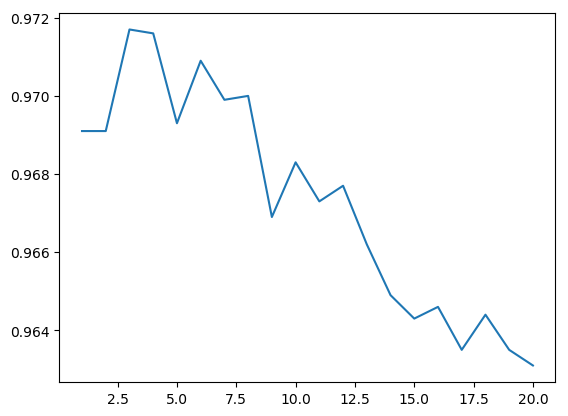

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000006B214128>

In [19]:
plot(1:20, preds)

In [20]:
predictions3 = knn_predict(nearest_labels, 3)

10000-element Array{Int64,1}:
 7
 2
 1
 0
 4
 1
 4
 9
 5
 9
 0
 6
 9
 ⋮
 5
 6
 7
 8
 9
 0
 1
 2
 3
 4
 5
 6

In [21]:
freqtable(test_labels, predictions3)

10×10 Named Array{Int64,2}
Dim1 ╲ Dim2 │    0     1     2     3     4     5     6     7     8     9
────────────┼───────────────────────────────────────────────────────────
0           │  974     1     1     0     0     1     2     1     0     0
1           │    0  1133     2     0     0     0     0     0     0     0
2           │    9     7   997     2     0     0     1    14     2     0
3           │    0     1     4   975     1    13     1     7     4     4
4           │    0     5     0     0   948     0     5     4     1    19
5           │    4     1     0    12     2   860     5     1     3     4
6           │    4     3     0     0     4     3   944     0     0     0
7           │    0    18     4     0     2     0     0   994     0    10
8           │    7     0     3    13     5    11     3     4   923     5
9           │    3     4     2     7     9     4     1     8     2   969

In [22]:
freqtable(test_labels, prediction)

10×10 Named Array{Int64,2}
Dim1 ╲ Dim2 │    0     1     2     3     4     5     6     7     8     9
────────────┼───────────────────────────────────────────────────────────
0           │  973     1     1     0     0     1     3     1     0     0
1           │    0  1129     3     0     1     1     1     0     0     0
2           │    7     6   992     5     1     0     2    16     3     0
3           │    0     1     2   970     1    19     0     7     7     3
4           │    0     7     0     0   944     0     3     5     1    22
5           │    1     1     0    12     2   860     5     1     6     4
6           │    4     2     0     0     3     5   944     0     0     0
7           │    0    14     6     2     4     0     0   992     0    10
8           │    6     1     3    14     5    13     3     4   920     5
9           │    2     5     1     6    10     5     1    11     1   967

In [23]:
freqtable(test_labels, predictions3) - freqtable(test_labels, prediction)

10×10 Named Array{Int64,2}
Dim1 ╲ Dim2 │  0   1   2   3   4   5   6   7   8   9
────────────┼───────────────────────────────────────
0           │  1   0   0   0   0   0  -1   0   0   0
1           │  0   4  -1   0  -1  -1  -1   0   0   0
2           │  2   1   5  -3  -1   0  -1  -2  -1   0
3           │  0   0   2   5   0  -6   1   0  -3   1
4           │  0  -2   0   0   4   0   2  -1   0  -3
5           │  3   0   0   0   0   0   0   0  -3   0
6           │  0   1   0   0   1  -2   0   0   0   0
7           │  0   4  -2  -2  -2   0   0   2   0   0
8           │  1  -1   0  -1   0  -2   0   0   3   0
9           │  1  -1   1   1  -1  -1   0  -3   1   2

In [24]:
wrong_predictions = findall(predictions3 .!= test_labels)

283-element Array{Int64,1}:
   66
  116
  196
  242
  248
  301
  321
  322
  342
  359
  382
  413
  446
    ⋮
 9771
 9780
 9809
 9812
 9840
 9868
 9876
 9880
 9884
 9905
 9945
 9983

In [25]:
vbox(hbox([vbox(Gray.(test_images[i]),
                "True: $(test_labels[i]), pred: $(predictions3[i])") for i in wrong_predictions[1:8]]...),
     hbox([vbox(Gray.(test_images[i]),
                "True: $(test_labels[i]), pred: $(predictions3[i])") for i in wrong_predictions[9:16]]...),
     hbox([vbox(Gray.(test_images[i]),
                "True: $(test_labels[i]), pred: $(predictions3[i])") for i in wrong_predictions[17:24]]...),
     hbox([vbox(Gray.(test_images[i]),
                "True: $(test_labels[i]), pred: $(predictions3[i])") for i in wrong_predictions[25:32]]...))

(div { style=Dict("display"=>"flex","flex-direction"=>"column") }
  (div { style=Dict("display"=>"flex","flex-direction"=>"row") }
    (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
      (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAFISURBVGje7dmvSwRBGMbxjz8Qi8VrGjSZ/Q/UJGbBP8FiMZmsdtHgXyFWTcYrgs1iEBG0HFi0nZzhRjwEYZcBnRvep8zOy858efbhhd1ZQqFQKBQKhcZfE7kb3OMAFw3vn/xrh/UDp3M3GGBNZPiPwFYZdrCLE7yPi8P6ga0ynMcRbnE5Lg4DGMDyga36cCONiyO1lx/z4hzWD2yV4UoaeyO1a+yV7LB+YOMMZ7GND7yOk8P6gY0zPMQS+tjCaqrv4Kpkh/UDG3/j9wzfS0cXDtL1CfZLdVg/sHEffoXdxTGe0/xcu8Oe+h9puRne4NTwu7CfasuY8d2PRTqsH9g4w81fFk+V7rB+YNZ5aQdzpTsMYADLB2b14UIauyU7rB+YleF6Gh9KdhjAAJYPzP4H/IS7kh3WD8zK8BFneCvZYf3AUCgUCuXrE2dRIn9uBsfWAAAAAElFTkSuQmCC'></img>" })
      "True: 4, pred: 9")
    (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
      (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAHESURBVGje7dm/a1RBFMXxjxq1cP8BhaiFNjGFjY1lIGWKgKKFCHbBKqDBgJ0IYqGBFFapEyGoIFhoFWwEUbARLLUykCagEVH8UcwrNkbYNyu4s5c5zQy8N5z9crj3zcxSVVVVVVVVtetfFs/gHs7gYcs1u/83YXzDkX4XXsYifuFTyYTxDfuqw9NYw3dcxIOSCeMbZtfhGFaa+by8/AZCGN8wqw6P4jkO4orUS4snjG/Yug5HcAeHsGB7fnvwU/o2FkcY37B1hrOYxn3M/fGLV/AMSyUSxjds1UuPSD10E+fwruvZYbzHW5zC19II4xu2qsNrGMVd2/Pbi5vNfF3v/AZCGN+wZ4bHcAlP7NzDjOJCM39cKmF8w54ZTmG/vzfds13z1VIJ4xv2/B6O4Y0U9iPcwiscx2t0pL3MjLQ3LY4wvmGrPc113Ghe3sRL6a6mgx9ST10vlTC+Yesz/nnclvLq1homSiaMb5h1T7NPOs+fkGpxC+P4UDJhfMOs+9Jvzdhpxo/y8hsIYXzDvv57utqMT4eBML5hdoYnMTlMhPENszM8IN3PfMbyMBDGN8zOcANfpLPhi2EgjG9YVVVVVVVVxW9aRjx8x3/aoAAAAABJRU5ErkJggg=='></img>" })
      "True: 4, pred: 9")
    (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
      (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAGaSURBVGje7dkxaxRBHIbxn3JJSNJYCIJypJAIEUxlIdgFIV2KNNdo6QcQIYlYBGzUfAWx9zOkEFMZsBBsQgpFIU2aw0CI2kiKueIK986VxZv9M29z3MwsD8+97O7NLiUlJSUlJSUlJSWTz4VxCx6jh9uDxZ/wCG//EXjxfxvGB3aqJqbwCqt4jXXcwQs8UDrMCFh5Hs7hFEs4HBrfks7DK20xjA+s7HAGX3AL/aHxLr5hBe/aYBgfWHkt/YV7OKuYX2iLYXxgZ9TkwR/GZtpmGB/YqXtAb/D5tS2G8YG1O7yM99hri2F8YK0Ob+A+nrfJMD5w7B5/OLvS/5yP+I4T7GA/Z8P4wFodnuEYnwcHzkr7/iPclPaT2RnGB9bq8JrU08ng+xSuYgN38RAfcjOMD6zV4ag8lbpclp4BZGMYH9hYh6T75C42czKMD2y0wyfYxiX8zMUwPrDRDhel5+Pz+JGLYXxg7T3+qPT/Yk38n7TdHa7laBgf2FiH09I7/5fSO49sDOMDG+mwi2e4jjf4nZNhfGBJScnkcw4CdzEHbgJ9zgAAAABJRU5ErkJggg=='></img>" })
      "True: 3, pred: 5")
    (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
      (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAIESURBVGje7dnNi45RHMbxj/FEFiz1GHmZTGaMbCzszEY2bJQUUtjM8C9MISllw0LGRqbYURMbZSOxs/faeMliMkkppbxMWZzz1ERzP0dqnDmdq57Oc9+/X+fq6tt9d59+VFVVVVVVVVUtfi1JbezFCRzCpnhvAg9wCz8S9+lZ6ITlG3Zl2IPDGMPAPD0vsBvTOSYs37ArwxFcjf+/4AZex+t+jGKp8CwewWxuCcs3bGR4EKcwiFfYg7e/9RzAJaxBH97nlrB8w1ZTcafAbwZ7/ckPbuO0wDDLhOUbtlKabuLNYk1YvmESw5ku9UkMYb/wXs0qYfmGSQxHcLGhvjWuW3JMWL5hEsNeDOPRPPWBlE3+V8LyDRsZTmAf2riMK3gZa33CuRE2xLWNZfieU8LyDbueD8dw7i82XIsPOSUs37Arw+XYhZPCmX4KO2LtCa5hG87Ge5VhXu9S+IZ78dcW+PTH2lRcV8zpH1QZLrCSvmk66rCZaugZwsOcEpZv2MhwNR7jLsbxLmHDydwSlm/YyPATruM8VuKCNI5ZJSzfsJHhrPDNckw45w8L54tp3JnTtz2uz/E1t4TlGybNgNfjPjbH65/CHKqjVcL8aVRgnlXC8g2T5/jrhPPD0XnqT4Xn9HNuCcs3TGbYaW4Js96NOC7MM57hDD7mmLB8w6qqqqqqf9cvbGBJ9wNT5ZMAAAAASUVORK5CYII='></img>" })
      "True: 9, pred: 8")
    (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
      (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQA

### A minimal intro to graph analysis

In [26]:
using LightGraphs

In [27]:
@time test_distances = euclidean.(test_images, permutedims(test_images))

 38.016522 seconds (11 allocations: 762.940 MiB, 0.02% gc time)


10000×10000 Array{Float64,2}:
  0.0      11.2688    8.53553  10.4155   …   8.92657   9.62214  12.4499
 11.2688    0.0       9.82534  11.2474      12.4085   10.2538   11.9218
  8.53553   9.82534   0.0      11.3819       9.21445   8.90848  11.6149
 10.4155   11.2474   11.3819    0.0         10.8698   10.4474    9.0114
  8.70647  11.5588    9.2377   10.7562      10.1767   11.0094   11.3722
  8.82369  10.2204    3.08158  11.581    …   9.01029   8.98499  11.9489
  8.19329  11.1739    9.23948  11.9762       8.99899   9.7354   12.705 
  9.72363  11.1096    8.65114  11.1223       9.0562   10.2768   11.5792
 11.1542   11.5426    9.91136  11.172       11.5015   11.9752   10.9737
  8.31466  12.3997    9.54172  10.3626       6.9696    9.41861  11.6234
 11.1871   11.2395   10.5238   10.0597   …  12.2529   11.7772   11.1891
 10.6671   10.2506    9.28776  10.0726      10.6484    9.26927  11.0633
  7.70321  11.3261    9.36965  10.1071       8.05871   9.76374  11.062 
  ⋮                               

In [28]:
test_neighbors = partialsortperm.(eachrow(test_distances), Ref(1:4))

10000-element Array{SubArray{Int64,1,Array{Int64,1},Tuple{UnitRange{Int64}},true},1}:
 [1, 4801, 495, 4084]     
 [2, 5522, 6801, 3259]    
 [3, 205, 3859, 3387]     
 [4, 2558, 6980, 3482]    
 [5, 7654, 4491, 2331]    
 [6, 4268, 9521, 5015]    
 [7, 2174, 4173, 3087]    
 [8, 6033, 4273, 6023]    
 [9, 68, 4178, 9134]      
 [10, 8978, 6659, 8275]   
 [11, 526, 425, 1778]     
 [12, 4687, 3902, 974]    
 [13, 5672, 6412, 9468]   
 ⋮                        
 [9989, 3571, 7998, 9261] 
 [9990, 3383, 7051, 9196] 
 [9991, 5564, 4774, 4678] 
 [9992, 3988, 7661, 1115] 
 [9993, 5492, 5003, 2478] 
 [9994, 6063, 7869, 7856] 
 [9995, 3639, 7354, 5763] 
 [9996, 4067, 1519, 200]  
 [9997, 5626, 4636, 809]  
 [9998, 5077, 8040, 7077] 
 [9999, 6137, 5112, 9261] 
 [10000, 7173, 9054, 7153]

In [29]:
g = SimpleGraph(10000)
for (i, v) in enumerate(test_neighbors)
    for j in 2:4
        add_edge!(g, i, v[j])
    end
end

we expect pictures that are bridges to be fuzzy (they match heterogenous images)

In [30]:
@time b = betweenness_centrality(g)

 50.287680 seconds (139.68 M allocations: 19.589 GiB, 6.22% gc time)


10000-element Array{Float64,1}:
 0.0009580163816836042 
 4.9425488103669694e-5 
 0.000571080234959791  
 0.0002636093876702154 
 0.0006420473849252409 
 0.00018385628672645926
 0.008736303309726681  
 0.00010958786693308285
 0.002491660828076158  
 0.000188704203857687  
 4.558787004893013e-5  
 8.276447654049255e-5  
 0.000676649523651491  
 ⋮                     
 0.001667153208042497  
 0.005251745589170444  
 0.00030911969268234324
 0.0005759559955804378 
 0.0008266046300215411 
 0.0                   
 0.0011832969552287246 
 0.0001918601261827889 
 0.00017246068801395303
 0.0012676334593958558 
 0.000338786403496966  
 7.654923977942367e-5  

In [31]:
rspb = reverse(sortperm(b))

10000-element Array{Int64,1}:
 6573
 6562
 6633
 6577
 6559
 7452
  304
 2920
 6570
 2794
 1717
 1385
 3190
    ⋮
 1580
 1529
 1412
 1338
 1187
 1033
  865
  832
  672
  585
  157
  142

In [32]:
vbox([vbox(Gray.(test_images[i]),
           "True: $(test_labels[i]), neighbors: $(test_labels[neighbors(g, i)])") for i in rspb[1:5]]...)

(div { style=Dict("display"=>"flex","flex-direction"=>"column") }
  (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
    (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAE8SURBVGje7dnBKkVRFMbxH8lAxMSVgZkxZga6MfUQHsHMTGYM5Qk8gXgE8QZSBoqh6NY1EmUgg3Mf4J6tdPZqfZNzJqt//77W7uwOmUwmk8lkMvVnonTwGIc4wBl+xpyb/G/D+MDiDm/QH72v4aGrhvGBU6WDX6PnKd66bBgfWLyHK5ozdB+vXTaMDyzukKbHTwy7bBgfmKk/xXvYw6BgLv5a1HOWXuAOJ103jA8s/i6dxkINhvGBxXu4o7lfDPHUZcP4wKI93MAc7vHddcP4wKIO57GI9xoM4wOLOuzjsRbD+MDWHa5jFbe1GMYHtu5wE3s4r8UwPrB1h0McYbkWw/jAVneLXczgErP4qMEwPrBVh1dYwlZNhvGBY5+lPc198KU2w/jAsTscaP7Xb+MZ17UYxgdmMplM5u/5BX8MId62Jo2hAAAAAElFTkSuQmCC'></img>" })
    "True: 1, neighbors: [8, 1, 7, 4, 6, 5, 8, 1, 3, 1, 7, 3, 5]")
  (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
    (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAGISURBVGje7dmtTh1RFIbhp00FiFY0wXAkCEgQrSApBlSD4hpKUsMdIHGtqesFVFS0DoJAIBCtQFFBgISkh6TmIEgaMCAwFXNEgbTZMyTMnpX9mcn85c2blTV7Zg0lJSUlJSUlJSUl7edR0xtX8BaT2MAPfEy47/FDG8YHPkm98CUu8QyzWMP18NgyznM1jA9MquEMlnCIFxjHh+H2BGN4mqthfGDSs3QeP//aH9w6v6p6nh7naBgfmNSH3/5z7it2cZarYXxg8nr4r0xgC79zNYwPvFcNJ9HHds6G8YH37sMZXOVsGB/YuIajeIN1XORsGB/YqIY9vFbVcTN3w/jARnOaOXxR1XBa+vtMK4bxgY368Dl+4b169WvFMD6wUQ0HeIX9LhjGB9au4ZRqDVxwd16TpWF8YO318BN28LkrhvGBtfpwESOq2XdnDOMDk/uwp/qe77s5/87eMD4wuQ/fYQ8Hqm+KOrOZVg3jA5P6cApHOFX1Y6cM4wOT/wF/76phfGBJSUn7+QM+WS6UwCWeOQAAAABJRU5ErkJggg=='></img>" })
    "True: 7, neighbors: [7, 3, 7, 8, 2, 5, 7, 9, 3, 1]")
  (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
    (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAGmSURBVGje7dmxS5VRHMbxjyEIkoPOgpqFgoP1FwRNLtnUGBJEQWuTm4OYkUMQLS2NIQ0NhS1BCBFE0RJNQUO0pIlNDYXY8F65S8O5J/Ce98d5lpf7wrlfvjycwznnpaampqampqam/RnIHTiFK1jGb0zgZ8K4E8dtGB84mDNoHJs4hxWM4RQ+lGgYH9hzh5c1/X3BJWyVbhgf2NNaOoPnuIVfeNkGw/jA5Hk4gle4g2c4bIthfGDyPFzDPBZx0Hk3iEl81exrijSMD0yah0P4g1Xd/mZwFvdxA09LNYwPTOpwAu/wtvN7AefxGI/wo2TD+MCktXQOtzXnv0PcxXfs4iHed55FGsYHJs3DT7im6W4DO5r+jrKb8if9MowPTN6X7mDpH+8H1A77DMy+a4OruKdZa7+VahgfmHXXdpQL2Mao2mEfgdkdnsEw1vGxZMP4wKwOR/AC+7rnxWIN4wOzOpzFNF7rnhmLNYwPzOrwuuZ+7UEbDOMDs/alb7CHi20wjA/seR7exGl8bothfGDP8/AJTmq+/6Z+q+irYXxgTU1NTc3/5y9LxTuYwSFWTQAAAABJRU5ErkJggg=='></img>" })
    "True: 9, neighbors: [7, 7, 9, 5, 8, 9, 5, 9]")
  (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
    (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAGOSURBVGje7dm/S1VhHMfxV5KEmIRLgzg0aVzIHMKc3FocXQIHB8HBrX+gv8GpwWxqcxGEBhGcWhpa3PqBNQcJCSJYkQ3nQHeRc+450H3Ol+ez3HMfHnjzvh++zz33HnJycnJycnJuVG2YwAfsYQtfrtm3htc1gCP/2zA+8GbVhgc4wyzu9K1P4xt+le/r9DcUw/jAyjmk6O4P5vG2XLuNi3IdNnGIk9QM4wNrdViVSdzFxxQN4wMrz9I6WcELPPFvTpMxjA9s1eE4djCKVbxP0TA+sFWHI5gqr9/gZ4qG8YGtOhzDEr6q/8Ua/yPtVocL5esBLlM1jA9sdV/6Dj08wqdUDeMDG8/hfVxhV/3+hmIYH9hqDk+xjv2UDeMDG3U4gad4jI3UDeMDG52lPbzETBcM4wMH7vBh3/X3LhjGBw7c4T3FWfoZv7tgGB/Y6CzdxjLOu2AYHzjQPc0MXuEWFhW/LZI3jA+sPYfP8ANziuf6TfobimF8YO0Oj3Gk+F/7eZcM4wNzcnJycnJy+AtjTC429jnruAAAAABJRU5ErkJggg=='></img>" })
    "True: 7, neighbors: [7, 6, 6, 9, 1, 7, 9]")
  (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
    (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAHCSURBVGje7dk9axZBGIXhy6hEEgwGTKegWIh26fwFFlYi2BgstBPT2FnF0koULEQQG0UQQYg2ChFBLKwUa/GDkEJ4IQmBKKKFxfPaBDG7i+jsw5xm2YXhcO/hzOzsUFVV9b+1pevAu5j

on the other hand we expect that if an image has a high PageRank then it is of a good quality

In [33]:
r = pagerank(g)

10000-element Array{Float64,1}:
 0.00011518214843225567
 7.392316470865964e-5  
 0.0001344597997224156 
 6.943597761051035e-5  
 0.00011067201687267097
 0.00011768858930808276
 0.00010516308215927994
 7.287133219910816e-5  
 7.243304807364018e-5  
 7.036495516558956e-5  
 7.219177511386835e-5  
 9.361707025205462e-5  
 0.00010544150377023322
 ⋮                     
 0.0001293330224322122 
 0.00015754170563513667
 0.000149924828626793  
 8.832118866348167e-5  
 0.00013441542419314947
 7.135329224607538e-5  
 0.00015634523086937723
 0.00011232933824627561
 6.928862406644562e-5  
 0.00010235431649177706
 9.266878287581623e-5  
 8.392882395876207e-5  

In [34]:
rspr = reverse(sortperm(r))

10000-element Array{Int64,1}:
 9334
 8742
 8904
 8990
 5397
 2031
 4457
 8586
 2084
 7818
 3846
 1295
 7142
    ⋮
 3539
 4130
 4847
 1167
 2564
 4645
  337
 3334
 7429
 2922
 2898
 1719

In [35]:
vbox([vbox(Gray.(test_images[i]),
           "True: $(test_labels[i]), neighbors: $(test_labels[neighbors(g, i)])") for i in rspr[1:5]]...)

(div { style=Dict("display"=>"flex","flex-direction"=>"column") }
  (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
    (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAGpSURBVGje7dk9a1RBFMbxn4lBo7VaiNHKyhcEQWKnIpjKwlIk+SxCPkKaqFjYWvkNBCsVQbGyURHUkEIsAgkEYjGzmGJ373V9mxzOA4e57Mzd/z48zGXOXlKpVCqVSqX2vvb9qS9awRrudqyb+tcO4wN7ZTiPLbwaMT+NVZzHxdYcxgfu77PoPg4oGW0Mmb+NJTxu0WF8YGeGp3BS2bCHDM9wvo5vWnQYH9iZ4THM4iHWR6w5i/d40KLD+MDODG91zM/gML7Was5hfGBnhlfreGTE/BWcw3KrDuMDx2Y4hzP1+umINZdbdxgfODbDaeVZCdeUHnBr1/wJ3GzdYXzg2AzX8VE5l97AN+zgc61Lfmb8slWH8YGdPf4d5Uw6NeTGnXr9HRfwoUWH8YGdZ5pHSkaLWFB6fUqfOFPrnn75/ReH8YG9/qd5Uus0jtfP3ir7c6F1h/GBvTIc6F2twS+d3QsO4wMnfm9xFF+wqfSIz1t1GB/4S/twt67X8aDSgzTrMIEJTGAC/74mfpYO9BovWnYYHzhxhp+U9xTPsN2yw/jAVCqVSv2+fgCfDjLVt4DaNAAAAABJRU5ErkJggg=='></img>" })
    "True: 4, neighbors: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]")
  (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
    (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAHzSURBVGje7dlPiE5RGMfxz3iHhYU/NQvFYkKKLGYzyZ+UZiHF1kIptnZSFpbeFFbCwtJESWKBBTsbkrIysZnlZKNolDLCWJx3crvm5b5eec88nd/qnnvPc7/9ejr3nuc5FBUVFRUVFQ39i5ccwXGMYgMuoI1vi8xd9r8dxgf2lcN1uIxDWFF7dhpX8GXQDuMDe85hC7ewHpsx0mXed2zF9KAdxgcO9xrwAPs710OYrzx7jYd4ifd+zd9AHMYH9pTDfZio3ZvDFC5K+fucm8P4wMY53IV7lYA5aZ21cSdnh/GBjXK4BuexqjN+g1N4vBQcxgc2yuEodlfG5/B8qTiMD2yUw0218U3M4Cwm8TVnh/GBjWqLMWmvuVjwVemf+C5Xh/GBjevDbRjvXB/GAT9ri2s4kavD+MC/6tMMSz2aG9iLWRzEsxwdxgf21WtbjfvYg1fSvudTbg7jA/vueW+X6sMtUr1xKTeH8YE999rqmpL6arA2R4fxgV3XYUs6UxrBB6meqNcQy6Uzi0msxAvszM1hfGDXdTiB65XxMXyUaohHnXsnsaMy53aODuMDu67DNs40CF44tyh7moEBu+Zwo7RXGftD8Dye4Cje5ugwPvC3+9KWVP+NS+e5pH/kwgf4Ke5K39zZXB3GBxYVFRUVFRXxA68MRk2LHEfdAAAAAElFTkSuQmCC'></img>" })
    "True: 5, neighbors: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]")
  (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
    (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAH8SURBVGje7dpNqE1RGMbx3xXXFV0SwumaGEii3BgYGRkY3zI18JVMRF0DkWRkopSJoYGhxMTE9CZFJj6K0JGSj3yElLgGa8t23GOfe4jV23pGe6+1Tv/19LTb6333oaioqKioqGigacEsHMRhXMODjvlLuIHnPQJn/GuH8YGNGbbwpGFNGxM4iVu5OYwPbMxwAKtwHvOqsdkYmWLtMyzPzWF8YGOGU2kYG7EQZ7CoGn+JJbk5jA+c2c+P3uEqjuFjbfxDjg7jA/vKcD524Ei140npTDOWo8P4wGllOBej2IZ91dgkXmAcN3N0GB/Y8/twLw5hRcf4BHbjTq4O4wN7zvCxX/MjvRsv4AQe5ugwPnDaGd6u7XJ1bb6NLbifm8P4wJ4zXIdBP2e4CeewtLq/izW5OYwP7Ks+rGsMp7Gsuj8l9eaycRgf+McZwk6cra7fYC2e5uIwPrCv+rBTV/AJQ1iAOTk5jA/8Kxl+xnspw+wcxgd2zbAl1QvrsRlvu6wbwn4/eqaP8Donh/GBXTM8gO3V9T2pjr9cm29hF7ZK/W/S83gcr3JyGB/Y9Uwziuu1HX2VnrHvGsbi2v0X6Uw6npvD+MDfnkv3SN/vR6S+aDe1cVSqFbNzGB/YWFuslOq9QalPs0E6e5LqiYtSr7v8F+O/AYuKioqKior4BjW6R2FTYq6AAAAAAElFTkSuQmCC'></img>" })
    "True: 3, neighbors: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]")
  (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
    (div { setInnerHtml="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAAAAADji6uXAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAICSURBVGje7dnNq01RHMbxD1FnQPeWUwbeysBMpt6mXmJk5paXIuUtyURduWF21R25pQzkL5CJJKWk7gQ3eRkgg9tNKYpSDG5eBr9dDu3DPkfH2We1ntHaq1/72U/f1q+19iIrKysrKysra/A1r1cvbuIUXuJay/z8/50wfcMFvXrxbhzElMywx+qY4S6swwQ+tak5hHMYxo1+J0zfsKNeulL0xifYio8lNQ28xlJMYwfe9zNh+oaV12FTMJnDFeX8FuOk4PcFR/zKry8J0zesxLCJs6I33sPtNnUbcLgY38KjOiRM37ASwxEcE2vwDGZLajZhXKzBKVysS8L0Df/K8LxgCHfwoU3dAawtxmN4WJeE6Rv+keFx7MEqsZc5jRcldaPYW4xPiHVYm4TpG5buS8ewD8uwsGV+Fl+L8WPcx/Kidgneip46U6eE6RuWMpwWZ8AqX/ut5XkGGwXL2iRM37C0l05gP57jLrZhzW81K4q578XzHB7UMWH6hl3/Lz2KS4LhdVzAszomTN+wK4YjmBTnxafYgnd1TZi+YVf/vDdjSHDbqTq/viRM37BjhqN+nhev4k3dE6